In [1]:
import json
data = json.load(open("GBR_pred.json", "r"))

In [2]:
y_test = data["predictions"]["test_labels"]
y_test_pred = data["predictions"]["test_pred"]
y_train = data["predictions"]["trn_labels"]
y_train_pred = data["predictions"]["trn_pred"]

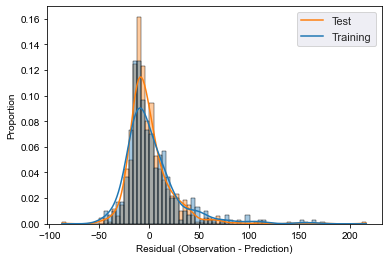

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

test_colour = (217/255, 121/255, 11/255)
trn_colour = (39/255, 119/255, 168/255)

def plot_residual_histogram(y_test, y_test_pred, y_train, y_train_pred):
    test_res = np.array(y_test) - np.array(y_test_pred)
    trn_res = np.array(y_train) - np.array(y_train_pred)
    
    sns.histplot(data=[test_res, trn_res], 
                 color=[test_colour, trn_colour],
                 alpha=0.4,
                 #bins=30,
                 multiple='layer',
                 kde=True,
                 stat='proportion',
                 common_norm=False)
                 
    sns.set_theme(rc={'figure.figsize':(8, 8)})
    sns.set_style("darkgrid")
    ax.set(xlabel ="Residual (Observation - Prediction)")
    ax.legend(labels=['Test', 'Training'])
    

plot_residual_histogram(y_test, y_test_pred, y_train, y_train_pred)

#### 

In [4]:
#fig.savefig('reshist.png', transparent=True)
# make background transparent (https://stackoverflow.com/questions/4581504/how-to-set-opacity-of-background-colour-of-graph-with-matplotlib)
fig.savefig('reshist.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [5]:
import requests
# You can create a session on the web app, get the session ref from F12  
# console and plug in below, it will use the selected experiment
session_ref = 'eg'
url = 'https://igi-ml-server.azurewebsites.net/api/v1/regression/predictions'
r = requests.get(f'{url}?session_ref={session_ref}')
resp = json.loads(r.text)

pred = resp["predictions"]
test = np.array(pred["test_labels"])
test_pred = np.array(pred["test_pred"])
train = np.array(pred["trn_labels"])
train_pred = np.array(pred["trn_pred"])

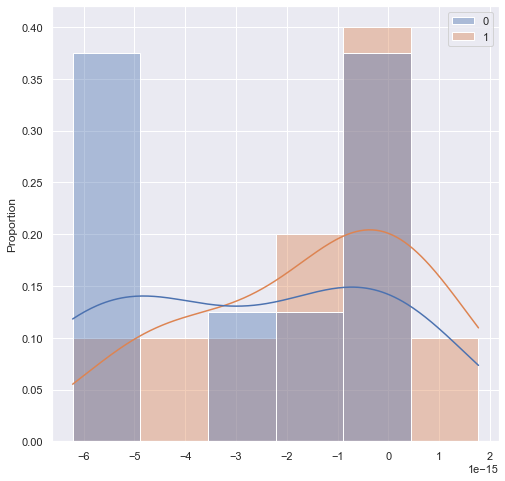

In [6]:
plot_residual_histogram(test, test_pred, train, train_pred)

C:\Users\ChrisProsser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ChrisProsser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


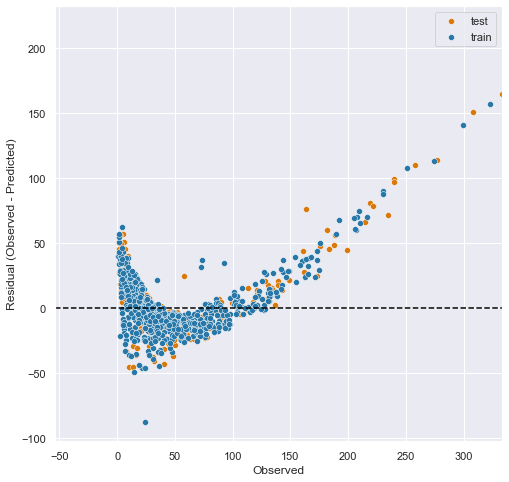

In [7]:
def plot_residuals(y_test, y_pred, y_train, y_train_pred):
    # plot residuals
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    min_x = min(min(y_test), min(y_pred))
    max_x = max(max(y_test), max(y_pred))
    sns.scatterplot(y_test, y_test - y_pred, ax=ax, color=test_colour, label='test')
    sns.scatterplot(y_train, y_train - y_train_pred, ax=ax, color=trn_colour, label='train')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Residual (Observed - Predicted)')
    ax.axhline(0, color='black', linestyle='--')
    ax.legend()
    ax.set(xlim=(min_x, max_x))
    #return fig

plot_residuals(y_test=np.array(y_test), y_pred=np.array(y_test_pred), 
               y_train=np.array(y_train), y_train_pred=np.array(y_train_pred))

C:\Users\ChrisProsser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ChrisProsser\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


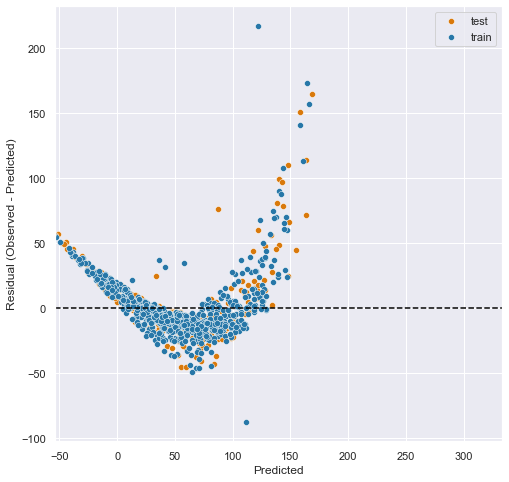

In [8]:
def plot_residuals_vs_pred(y_test, y_pred, y_train, y_train_pred):
    # plot residuals
    min_x = min(min(y_test), min(y_pred))
    max_x = max(max(y_test), max(y_pred))
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    sns.scatterplot(y_pred, y_test - y_pred, ax=ax, color=test_colour, label='test')
    sns.scatterplot(y_train_pred, y_train - y_train_pred, ax=ax, color=trn_colour, label='train')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Residual (Observed - Predicted)')
    ax.axhline(0, color='black', linestyle='--')
    ax.legend()
    ax.set(xlim=(min_x, max_x))
    #return fig

plot_residuals_vs_pred(y_test=np.array(y_test), y_pred=np.array(y_test_pred), 
    y_train=np.array(y_train), y_train_pred=np.array(y_train_pred))

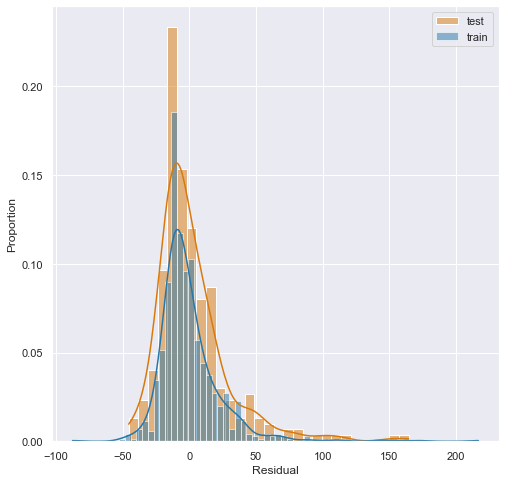

In [9]:
# can set bins independently for test & training if we do as 2 histplots rather than one with two datasets...
# downside - all proportions will be lower if more bins, so not really normalised...
def plot_residual_hist2(y_test, y_test_pred, y_train, y_train_pred, figsize=(8, 8)):
    test_res = np.array(y_test) - np.array(y_test_pred)
    trn_res = np.array(y_train) - np.array(y_train_pred)
    # plot residuals
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.histplot(test_res, ax=ax, color=test_colour, label='test', kde=True, stat='proportion')
    sns.histplot(trn_res, ax=ax, color=trn_colour, label='train', kde=True, stat='proportion')
    ax.set_xlabel('Residual')
    ax.legend()
    #return fig

plot_residual_hist2(y_test, y_test_pred, y_train, y_train_pred)

### Try with dataframe

Issues with above
* using two series seems to get colours back to front
* docs examples all use a dataframe

In [83]:
import pandas as pd

In [99]:
df = pd.read_csv('non_linear_darcy_weisbach_1k.csv', skipinitialspace=True)
features = df.columns[:-1]
target = 'Pressure Drop (Pascals)'
df

,L: Pipe Length (m),D: Pipe Diameter (m),V: Flow Velocity (m/s),p: Density of fluid (kg/m³),f: Darcy Friction Factor,Pressure Drop (Pascals)
0,10,2.0,48.74,829,0.000001,4.923405
1,70,1.8,53.61,786,0.000001,43.924791
2,65,2.0,38.93,771,0.000001,18.987883
3,55,0.8,46.52,801,0.000001,59.587427
4,65,1.6,42.50,756,0.000001,27.737227
...,...,...,...,...,...,...
995,55,1.6,62.32,791,0.000001,52.801235
996,25,1.3,40.06,781,0.000001,12.051458
997,85,2.0,62.08,770,0.000001,63.059871
998,60,0.5,76.98,838,0.000001,297.955278


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
X, y = df[features].values, df[target].values
ind = [i for i in range(df.shape[0])]
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, ind,
    train_size=0.7, random_state=1)
model.fit(X_train,(y_train))

LinearRegression()

In [102]:
model.predict(X)

array([-28.23053167,  49.85922041,   2.5547892 ,  69.51841803,
        28.85530002,  41.14958809,  22.58303633,  75.25131436,
        13.12954048,  31.39823401,  14.09601795,  78.00870213,
        65.19087474, -14.76861125,   7.61754026,  56.0739431 ,
        86.33477479,  -5.59440875,  52.40384575, 105.91083023,
         9.40286289,  32.24482287,  94.85320042,  80.78890878,
        38.25760266,   6.33161148,  63.12771339,  58.17552939,
        45.93241667, -15.66427834,  41.86157953,  30.18559126,
        45.33732821,  -3.67369094, 107.49251358,  83.52825349,
        21.46576093, 106.95203408,  88.46409605,  27.07761833,
        32.74708827,  41.27940421,  45.2590738 , 103.3627976 ,
        35.44747081,  64.61795432,  57.67348229,  51.09315794,
        40.67077995,  15.61043365,  79.65520794, -13.05463734,
         3.77073057,  -7.2897682 ,  52.19611304,  27.08622532,
        15.52014776,  82.31464036,  32.26674363,  62.7590778 ,
        99.35862165,  79.75384577, 105.47738477,  63.80

In [105]:
groups = ['Test' if i in set(i_test) else 'Training' for i in ind]
predictions = model.predict(X)
res = [obs - pred for (obs, pred) in zip(df[target].values, predictions)]

outcomes_df = pd.DataFrame({
        'Target': df[target].values,
        'Prediction': predictions,
        'Group': groups,
        'Residual': res
    })

outcomes_df

,Target,Prediction,Group,Residual
0,4.923405,-28.230532,Training,33.153937
1,43.924791,49.859220,Training,-5.934430
2,18.987883,2.554789,Test,16.433094
3,59.587427,69.518418,Test,-9.930991
4,27.737227,28.855300,Training,-1.118073
...,...,...,...,...
995,52.801235,63.509319,Test,-10.708084
996,12.051458,-0.459897,Test,12.511355
997,63.059871,72.329405,Test,-9.269534
998,297.955278,156.982310,Training,140.972968


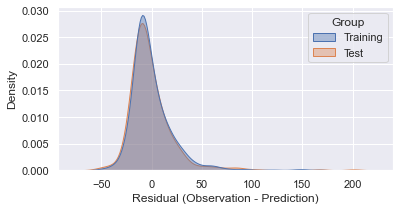

In [113]:
from matplotlib.figure import Figure

def plot_residual_histogtam(df, figsize=(6, 3)) -> Figure:
    # plot residuals
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.set_theme(style='darkgrid')
    
    sns.kdeplot(data=df, 
                x="Residual",
                hue="Group",
                alpha=0.4,
                multiple='layer',
                fill=True,
                common_norm=False)

    ax.set(xlabel ="Residual (Observation - Prediction)")
    #ax.legend(labels=['Test', 'Training'])

    #return fig

plot_residual_histogtam(outcomes_df)